<a href="https://colab.research.google.com/github/HoanDiep/Final_project_AI-vehicle-classification-/blob/main/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = '/content/drive/My Drive/Colab Notebooks/data_AI/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('bicycle'):
    output = 0
  elif file.startswith('boat'):
    output = 1
  elif file.startswith('car'):
    output = 2
  elif file.startswith('motorbike'):
    output = 3
  elif file.startswith('airplane'):
    output = 4
  elif file.startswith('train'):
    output = 5
  elif file.startswith('truck'):
    output = 6
  else:
    continue
  photo = load_img(folder + file, target_size=(90, 120))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
save('photos_AI.npy', photos)
save('labels_AI.npy', labels)

In [ ]:
!cp photos_AI.npy "/content/drive/My Drive/Colab Notebooks"
!cp labels_AI.npy "/content/drive/My Drive/Colab Notebooks"

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/My Drive/Colab Notebooks/photos_AI.npy')
labels = np.load('/content/drive/My Drive/Colab Notebooks/labels_AI.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1)

In [ ]:
x_train.shape


(10778, 90, 120, 3)

In [ ]:
x_test.shape

(1198, 90, 120, 3)

In [ ]:
x_train = x_train.reshape(10778, 90, 120, 3)
x_test = x_test.reshape(1198, 90, 120, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
labels_vehicle = ['bicycle','boat','car','motorbike','airplane','train','truck']

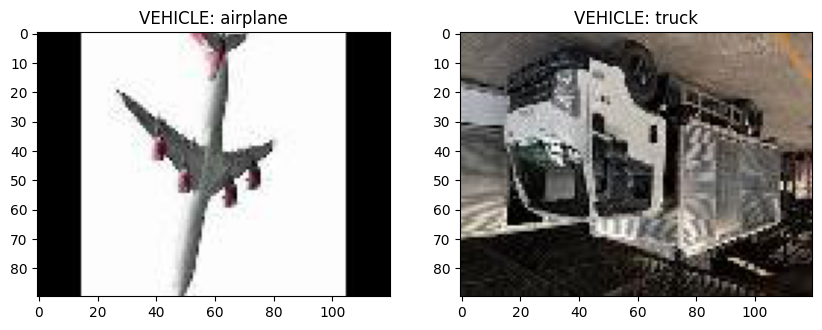

In [ ]:
from matplotlib import pyplot as plt
# Plot the first two images of the training set
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(x_train[0], cmap='gray')
plt.title("VEHICLE: {}".format(labels_vehicle[y_train[0]]))
plt.subplot(122)
plt.imshow(x_test[300], cmap='gray')
plt.title("VEHICLE: {}".format(labels_vehicle[y_test[300]]))
plt.show()

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(90,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 88, 118, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 59, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 44, 59, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 59, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 29, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 22, 29, 64)        0

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, batch_size=12, epochs=100, verbose=1)

Epoch 1/100
899/899 [==============================] - 21s 9ms/step - loss: 1.6022 - accuracy: 0.3655
Epoch 2/100
899/899 [==============================] - 7s 8ms/step - loss: 1.2951 - accuracy: 0.5096
Epoch 3/100
899/899 [==============================] - 8s 9ms/step - loss: 1.1263 - accuracy: 0.5880
Epoch 4/100
899/899 [==============================] - 8s 8ms/step - loss: 0.9985 - accuracy: 0.6381
Epoch 5/100
899/899 [==============================] - 8s 9ms/step - loss: 0.9113 - accuracy: 0.6727
Epoch 6/100
899/899 [==============================] - 8s 8ms/step - loss: 0.7947 - accuracy: 0.7129
Epoch 7/100
899/899 [==============================] - 8s 8ms/step - loss: 0.7182 - accuracy: 0.7397
Epoch 8/100
899/899 [==============================] - 8s 9ms/step - loss: 0.6507 - accuracy: 0.7623
Epoch 9/100
899/899 [==============================] - 7s 8ms/step - loss: 0.5853 - accuracy: 0.7876
Epoch 10/100
899/899 [==============================] - 8s 9ms/step - loss: 0.5328 - accur

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss:',test_loss)

38/38 [==============================] - 1s 10ms/step - loss: 1.9267 - accuracy: 0.7329
test_acc: 0.7328881621360779
test_loss: 1.926650047302246


In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/VEHICLE.h5')

1/1 [==============================] - 0s 218ms/step
car


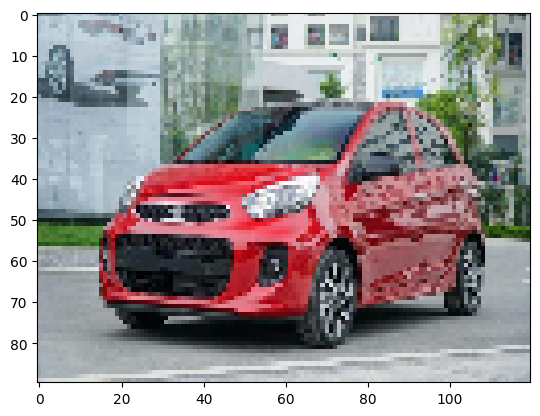

In [ ]:

img = load_img('/content/drive/My Drive/Colab Notebooks/oto.jpg',target_size=(90,120))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 90, 120, 3)
img = img.astype('float32') / 255
result = labels_vehicle[np.argmax(model.predict(img))]
print(result)